In [1]:
greetings = "Assalam-o-Alaikum!"
print(greetings)

Assalam-o-Alaikum!


### Importing the required libraries

In [51]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

### Exploratory Data Analysis

In [3]:
# Import Data
df = pd.read_csv("Co2.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
# Data Types
df.dtypes

MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object

In [5]:
# Complete information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [6]:
# Data Exploration: Summarize Data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [7]:
# Rename features
df = df.rename(columns = {"MODELYEAR": "Year", "MAKE": "Make", "MODEL": "Model", "VEHICLECLASS": "Class", "ENGINESIZE": "Engine Size", "CYLINDERS": "Cylinders", "TRANSMISSION": "Transmission", "FUELTYPE": "Fuel Type", "FUELCONSUMPTION_CITY": "City (L/100km)", "FUELCONSUMPTION_HWY": "Highway (L/100km)", "FUELCONSUMPTION_COMB": "City Highway (L/100km)", "FUELCONSUMPTION_COMB_MPG": "City Highway mpg", "CO2EMISSIONS": "Co2 Emissions"})
df.head()

,Year,Make,Model,Class,Engine Size,Cylinders,Transmission,Fuel Type,City (L/100km),Highway (L/100km),City Highway (L/100km),City Highway mpg,Co2 Emissions
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [8]:
# Shape
df.shape

(1067, 13)

In [9]:
# Count Rows
df.count()

Year                      1067
Make                      1067
Model                     1067
Class                     1067
Engine Size               1067
Cylinders                 1067
Transmission              1067
Fuel Type                 1067
City (L/100km)            1067
Highway (L/100km)         1067
City Highway (L/100km)    1067
City Highway mpg          1067
Co2 Emissions             1067
dtype: int64

In [10]:
# No Missing Values
df.isnull().head()

,Year,Make,Model,Class,Engine Size,Cylinders,Transmission,Fuel Type,City (L/100km),Highway (L/100km),City Highway (L/100km),City Highway mpg,Co2 Emissions
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False


### Correlation using Heatmaps

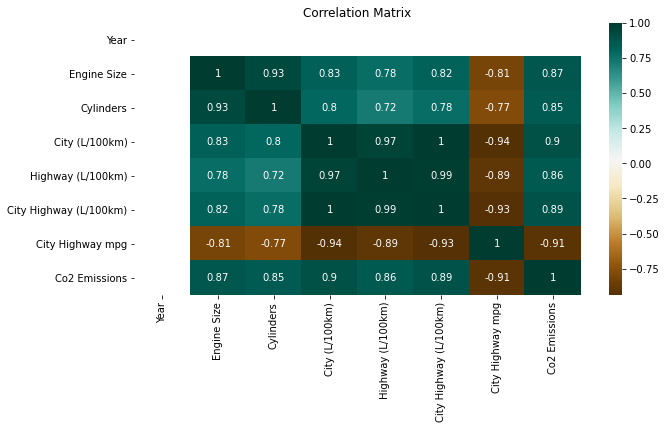

In [11]:
# Correlation Heatmap
plt.figure(figsize = (10, 5))
c = df.corr()
sns.heatmap(c, cmap = "BrBG", annot = True)
plt.title("Correlation Matrix")
plt.show()

In [12]:
# Economical Car
df[df["City (L/100km)"] == df["City (L/100km)"].min()]

,Year,Make,Model,Class,Engine Size,Cylinders,Transmission,Fuel Type,City (L/100km),Highway (L/100km),City Highway (L/100km),City Highway mpg,Co2 Emissions
988,2014,TOYOTA,PRIUS c,COMPACT,1.5,4,AV,X,4.6,4.9,4.7,60,108


In [13]:
# Expensive Car
df[df["City (L/100km)"] == df["City (L/100km)"].max()]

,Year,Make,Model,Class,Engine Size,Cylinders,Transmission,Fuel Type,City (L/100km),Highway (L/100km),City Highway (L/100km),City Highway mpg,Co2 Emissions
228,2014,CHEVROLET,EXPRESS 3500 PASSENGER,VAN - PASSENGER,6.0,8,A6,E,30.2,20.5,25.8,11,413
452,2014,GMC,SAVANA 3500 PASSENGER,VAN - PASSENGER,6.0,8,A6,E,30.2,20.5,25.8,11,413


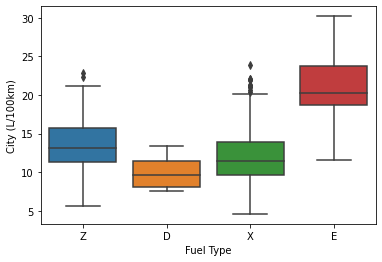

In [14]:
# Fuel Type vs City (L/100km)
sns.boxplot(x = "Fuel Type", y = "City (L/100km)", data = df)

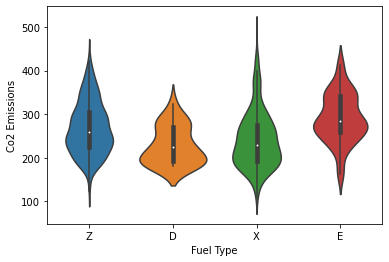

In [15]:
# Fuel Type vs Co2 Emissions
sns.violinplot(x = "Fuel Type", y = "Co2 Emissions", data = df)

### Simple Linear Regression

In [16]:
# Extract Features for prediction
X = df[["Engine Size", "Cylinders", "City Highway (L/100km)", "Co2 Emissions"]]
X.head()

,Engine Size,Cylinders,City Highway (L/100km),Co2 Emissions
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


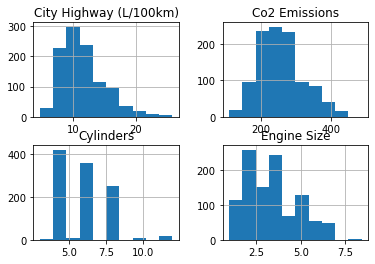

In [17]:
# Plot these variables
X.hist()
plt.show()

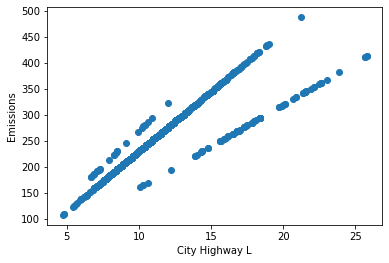

In [18]:
# Now, lets plot each of these features vs the Emission, to see how linear is their relation:
plt.scatter(x = df["City Highway (L/100km)"], y = df["Co2 Emissions"])
plt.xlabel("City Highway L")
plt.ylabel("Emissions")
plt.show()

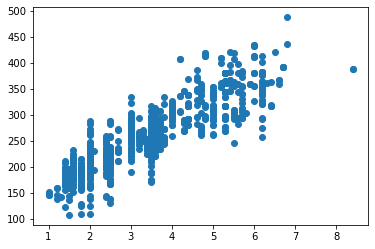

In [19]:
# Engine Size vs Co2 Emissions
plt.scatter(x = df["Engine Size"], y = df["Co2 Emissions"])
plt.show()

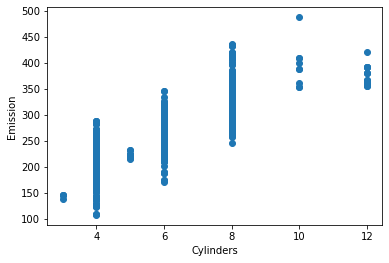

In [20]:
# Cylinder vs Emission
plt.scatter(x = df["Cylinders"], y = df["Co2 Emissions"])
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

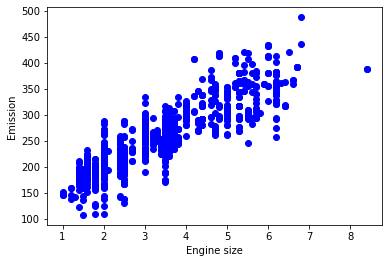

In [21]:
plt.scatter(df["Engine Size"], df["Co2 Emissions"],  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [22]:
# Prediction
x = df[["Engine Size"]]
y = df["Co2 Emissions"]
lr = LinearRegression()
lr.fit(x, y)
yhat = lr.predict(x)
pd.DataFrame({"Actual": y, "Predicted": yhat}).head()

,Actual,Predicted
0,196,203.554499
1,221,219.204579
2,136,183.991899
3,255,262.242299
4,244,262.242299


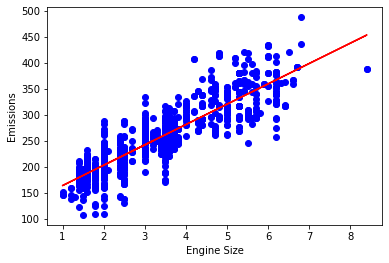

In [23]:
# Plot
plt.scatter(x, y, color = "blue")
plt.plot(x, yhat, "r")
plt.xlabel("Engine Size")
plt.ylabel("Emissions")
plt.show()

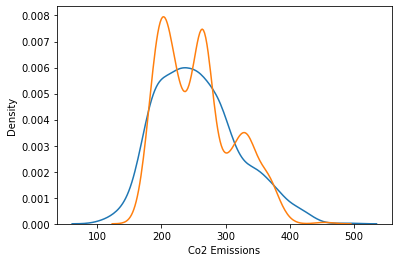

In [24]:
sns.kdeplot(data = df, x = y)
sns.kdeplot(data = df, x = yhat)
plt.show()

In [25]:
# Evaluation
r_squared = lr.score(x, y)
r_squared

0.7641458597854816

### Multiple Linear Regression

In [26]:
X = df[["Engine Size", "Cylinders", "City Highway (L/100km)"]]
y = df["Co2 Emissions"]

In [27]:
lr.fit(X, y)

LinearRegression()

In [28]:
yhat = lr.predict(X)
pd.DataFrame({"Actual": y, "Predicted": yhat}).head()

,Actual,Predicted
0,196,198.561534
1,221,213.458825
2,136,168.185271
3,255,254.825487
4,244,250.027671


In [29]:
lr.score(X, y)

0.8639967940584256

In [30]:
# Example 2
X = df[["City (L/100km)", "Highway (L/100km)"]]
y = df["Co2 Emissions"]
lr.fit(X, y)
yhat = lr.predict(X)
pd.DataFrame({"Actual": y, "Predicted": yhat}).head()

,Actual,Predicted
0,196,210.096431
1,221,227.868007
2,136,152.891939
3,255,247.917728
4,244,239.601476


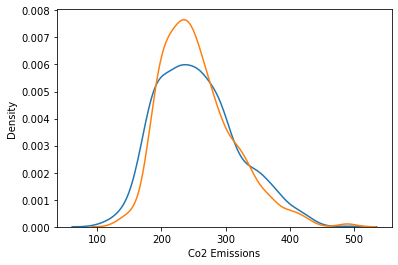

In [31]:
sns.kdeplot(data = df, x = y)
sns.kdeplot(data = df, x = yhat)
plt.show()

In [32]:
lr.score(X, y)

0.8069227472877706

### Polynomial Regression

In [73]:
X = df["Engine Size"]
y = df["Co2 Emissions"]

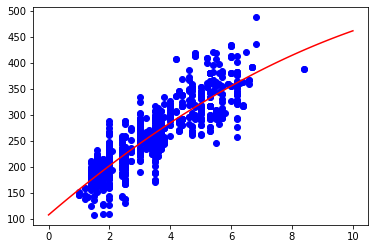

In [74]:
my_model = np.poly1d(np.polyfit(X, y, 2))
myline = np.linspace(0, 10, 100)
plt.scatter(X, y, color = "blue")
plt.plot(myline, my_model(myline), color ="r")
plt.show()

In [78]:
# Prediction
X = df[["Engine Size"]]
y = df["Co2 Emissions"]

Input = [("scale", StandardScaler()), ("polynomial", PolynomialFeatures(degree = 2)), ("mode", LinearRegression())]
pipe = Pipeline(Input)

pipe.fit(X, y)
ypipe = pipe.predict(X)
ypipe[0:5]

array([202.23785427, 219.71937679, 179.72026105, 265.35270015,
       265.35270015])

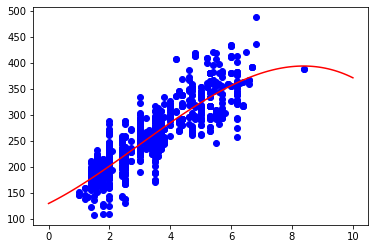

In [79]:
X = df["Engine Size"]
y = df["Co2 Emissions"]

my_model = np.poly1d(np.polyfit(X, y, 3))
myline = np.linspace(0, 10, 100)
plt.scatter(X, y, color = "blue")
plt.plot(myline, my_model(myline), color ="r")
plt.show()

In [80]:
X = df[["Engine Size"]]
y = df["Co2 Emissions"]

Input = [("scale", StandardScaler()), ("polynomial", PolynomialFeatures(degree = 3)), ("mode", LinearRegression())]
pipe = Pipeline(Input)

pipe.fit(X, y)
ypipe = pipe.predict(X)
ypipe[0:5]

array([201.83999847, 218.32388738, 181.89658944, 264.48811037,
       264.48811037])

In [69]:
# Evaluation
from sklearn.metrics import r2_score
X = df["Engine Size"]
y = df["Co2 Emissions"]
p = np.poly1d(np.polyfit(X, y, 3))
r_squared = r2_score(y, p(X))
r_squared

0.7675707961229573